In [2]:
import requests
from datetime import datetime
from time import time 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
base_url = "https://api.kucoin.com"

In [4]:
coin_pair = "BTC-USDT" 

In [5]:
frequency = "1day"

In [7]:
now_is = int(time())
days = 400

In [8]:
days_delta = 60 * 60 * 24 * days

In [10]:
start_At = now_is - days_delta

In [11]:
price_url = f"/api/v1/market/candles?type={frequency}&symbol={coin_pair}&startAt={start_At}&endAt={now_is}"

In [12]:
price_dict = {}

In [13]:
prices = requests.get(base_url+price_url).json()
for item in prices['data']:
  #convert date from timestamp to Y M D
  date_converted = datetime.fromtimestamp(int(item[0])).strftime("%Y-%m-%d")
  price_dict[date_converted] = item[2]
price_dict

{'2022-01-29': '37985',
 '2022-01-28': '38179.6',
 '2022-01-27': '37715.6',
 '2022-01-26': '37166.8',
 '2022-01-25': '36811.8',
 '2022-01-24': '36956.9',
 '2022-01-23': '36675.4',
 '2022-01-22': '36253.6',
 '2022-01-21': '35064.3',
 '2022-01-20': '36454.9',
 '2022-01-19': '40686',
 '2022-01-18': '41666',
 '2022-01-17': '42349.2',
 '2022-01-16': '42202.2',
 '2022-01-15': '43072.6',
 '2022-01-14': '43074',
 '2022-01-13': '43067.3',
 '2022-01-12': '42569.6',
 '2022-01-11': '43916.9',
 '2022-01-10': '42734.6',
 '2022-01-09': '41816.3',
 '2022-01-08': '41877.6',
 '2022-01-07': '41680.5',
 '2022-01-06': '41561.4',
 '2022-01-05': '43086.1',
 '2022-01-04': '43456.8',
 '2022-01-03': '45833',
 '2022-01-02': '46443.4',
 '2022-01-01': '47291.8',
 '2021-12-31': '47728.6',
 '2021-12-30': '46216.4',
 '2021-12-29': '47122.4',
 '2021-12-28': '46466.4',
 '2021-12-27': '47543.8',
 '2021-12-26': '50715.7',
 '2021-12-25': '50771.5',
 '2021-12-24': '50405.9',
 '2021-12-23': '50806.2',
 '2021-12-22': '50836.

In [14]:
priceDF = pd.DataFrame(price_dict,index=["price"]).T
priceDF['price'] = priceDF['price'].astype(float)

In [15]:
#convert dates to datetime from object
priceDF.index = pd.to_datetime(priceDF.index)

#reverse dates
priceDF = priceDF.iloc[::-1]

#moving_average 200 days(
priceDF['200MA'] = priceDF['price'].rolling(200).mean()
priceDF['52MA'] = priceDF['price'].rolling(52).mean()

priceDF

,price,200MA,52MA
2020-12-26,26282.5,NaN,NaN
2020-12-27,27075.6,NaN,NaN
2020-12-28,27383.3,NaN,NaN
2020-12-29,28868.1,NaN,NaN
2020-12-30,28920.5,NaN,NaN
...,...,...,...
2022-01-25,36811.8,48743.3305,45123.261538
2022-01-26,37166.8,48757.8470,44867.961538
2022-01-27,37715.6,48780.9780,44620.525000
2022-01-28,38179.6,48808.2500,44384.223077


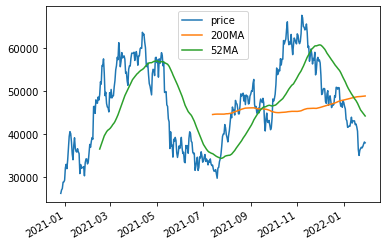

In [16]:
fig, ax = plt.subplots()
ax.plot(priceDF[['price','200MA','52MA']])
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
ax.legend(['price','200MA','52MA'])
# Use a more precise date string for the x axis locations in the toolbar.

plt.show()